# predicting heart disease using ml

this notebook looks into using various python-based ml and data science libraries in attempt to build ml model capabale of predicting whelter or not someone has heart-disease based on their medical attributes.

we're going to take following approach:

1. problem defination
2. data
3. evalution
4. features
5. modelling
6. expermintation

#  1. problem defination

in a statement ,
 > given clinical parametres about a patient, can we predict whelter or not has heart-disease or not
 
 # 2.data
  
  the oringal data came from thr cleavaland data from kaggale https://archive.ics.uci.edu/ml/datasets/Heart+Disease
  
  there is a version also that is avaiable at kaggale https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction
  
  
  # 3. Evaluation
  
  > if we can reach 95% accuracy at predicting whelther or not a patient has heart- disaease during thr proof of concept, we'll puruse the project.
  
  # Features
  
  >** create data dictonatry**
  
 1. age: Age of the patient (in years)
2. sex: Gender of the patient (0 = female, 1 = male)
3. cp: Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
4. trestbps: Resting blood pressure (in mm Hg)
5. chol: Serum cholesterol level (in mg/dl)
6. fbs: Fasting blood sugar > 120 mg/dl (0 = False, 1 = True)
7. restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)
8. thalach: Maximum heart rate achieved (in beats per minute)
9. exang: Exercise-induced angina (0 = No, 1 = Yes)
10. oldpeak: ST depression induced by exercise relative to rest (measured in mm)
11. slope: The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
12. ca: Number of major vessels (0-3) colored by fluoroscopy
13. thal: Thalassemia: a blood disorder (0 = normal, 1 = fixed defect, 2 = reversible defect)
14. target: Presence of heart disease (0 = No, 1 = Yes)

In [7]:
Only 14 attributes used:
    
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)

14. #58 (num) (the predicted attribute)

SyntaxError: invalid syntax (2315976694.py, line 1)

## preparing the tools 

We're going to use pandas numpy matplotlib for the data analysis


In [8]:
# import all the tools all we need

# regular EDA ( explotoing data analysis )and plotting libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


%matplotlib inline 

# we want our plots to appear inside the notebook

# models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model Evalutions
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc


## load data 

In [9]:
import pandas as pd

df = pd.read_csv("heart-disease.csv")
df.shape # (rows , coloumns)


(303, 14)


## data exploration ( exploratory dat analysis or EDA)



the goal here is to find out more about the data and become a subject matter export on the 

1. what question (s) are you trying to solve ?
2. what kind of data do we have and how do we treat different types?
3. what's is missing from the data anfd how do you deal with it.
4. where are the outliners and why should you care about them?
5. how can you add, change or remove features to get more out of your data ?



In [48]:

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
# let's find out how many of each class there 
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

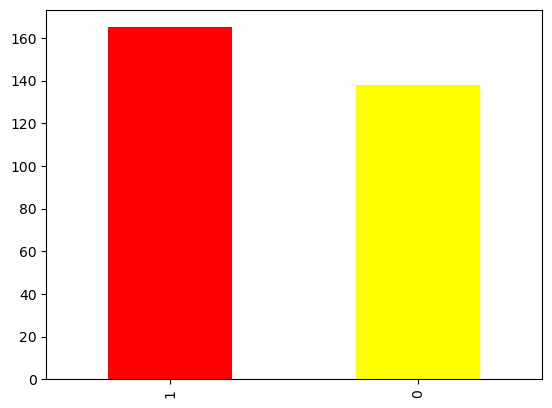

In [22]:
df["target"].value_counts().plot(kind="bar", color = ["red", "yellow"]);


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [27]:

# are there any missing values ?

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequancy according to sex

In [5]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [6]:
# compare target cpoumn with sex column 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


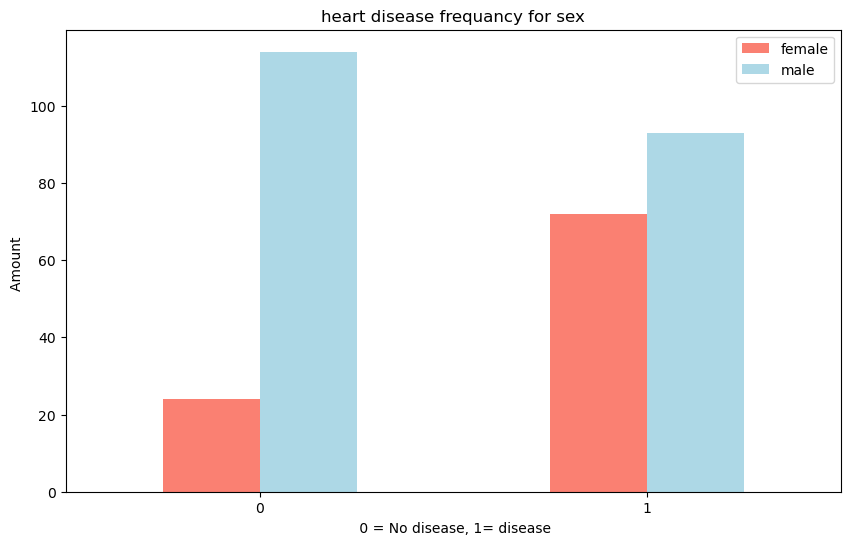

In [10]:
# create a plot crosstab 
pd.crosstab(df.target, df.sex).plot(kind="bar", color = ["salmon", "lightblue"] , figsize = (10,
                                                                                             6))
plt.title("heart disease frequancy for sex")
plt.xlabel(" 0 = No disease, 1= disease")
plt.ylabel("Amount ")
plt.legend(["female", "male"])
plt.xticks(rotation=0);

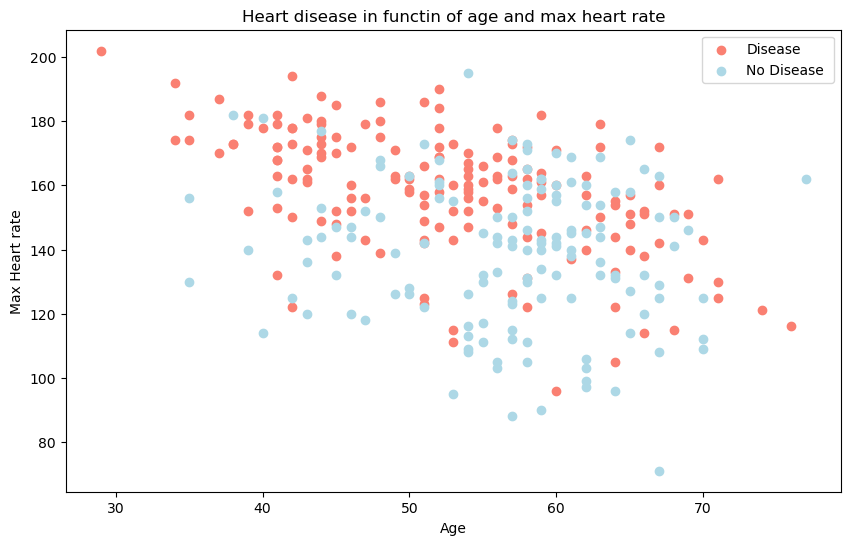

In [37]:
# create another figure
plt.figure(figsize=(10 , 6))

#scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon" 
           )
#scatter with nefgative values

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue"
           )
# adda some helpful knowlegde
plt.title("Heart disease in functin of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart rate")
plt.legend(["Disease", "No Disease "])

In [28]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

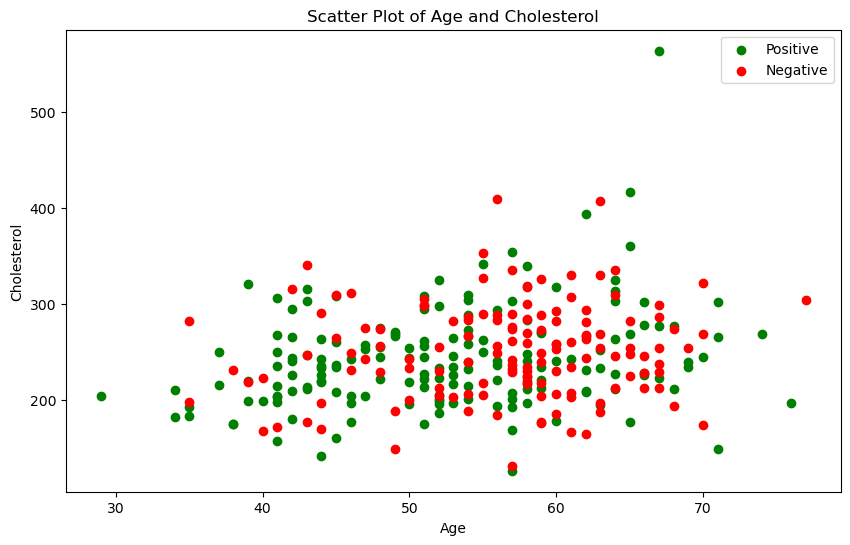

In [27]:
# create another figure
plt.figure(figsize=(10, 6))

# scatter with positive examples
plt.scatter(df.age[df.target==1], df.chol[df.target==1], color='green', label='Positive')

# scatter with negative examples
plt.scatter(df.age[df.target==0], df.chol[df.target==0], color='red', label='Negative')

# set labels and title
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot of Age and Cholesterol')

# add legend
plt.legend()

# show the plot
plt.show()

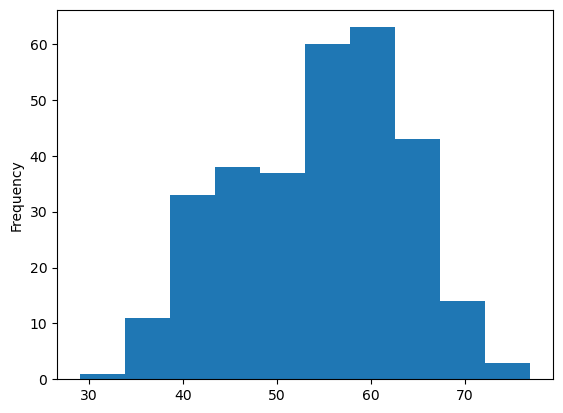

In [40]:
# check the distribution of the age histogram of the age coloumn

df.age.plot.hist();

In [6]:
# heart disease 
 # cp: Chest pain type (0 = typical angina,
                     #1 = atypical angina, 
                     #2 = non-anginal pain, 
                     #3 = asymptomatic)


pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


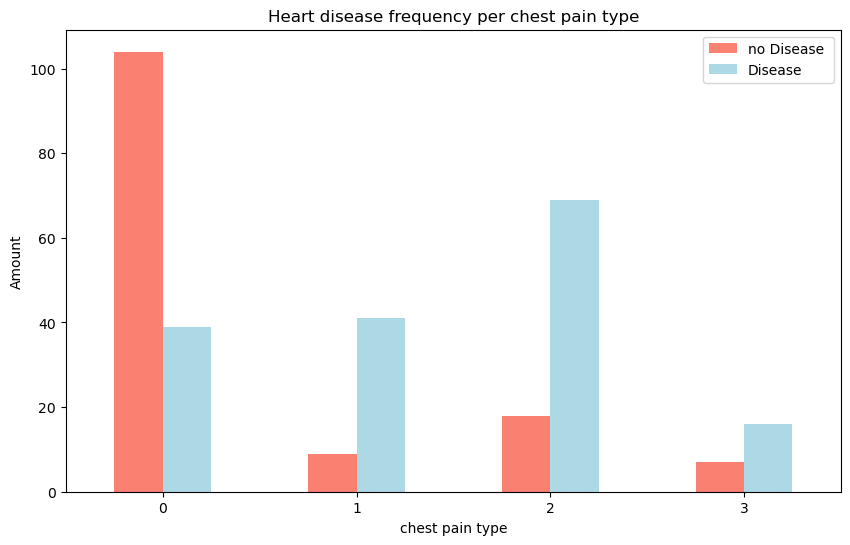

In [8]:
# make the crosstab more visual

pd.crosstab(df.cp, df.target).plot(kind="bar" , figsize=(10,6), color=["salmon", "lightblue"])

#add some communication
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("Amount")
plt.legend(["no Disease ", "Disease"])
plt.xticks(rotation=0);

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
#make a corelation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# lets make our corelation matrix a little prettier 
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot =True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap=" YlGnBu");
plt.show()

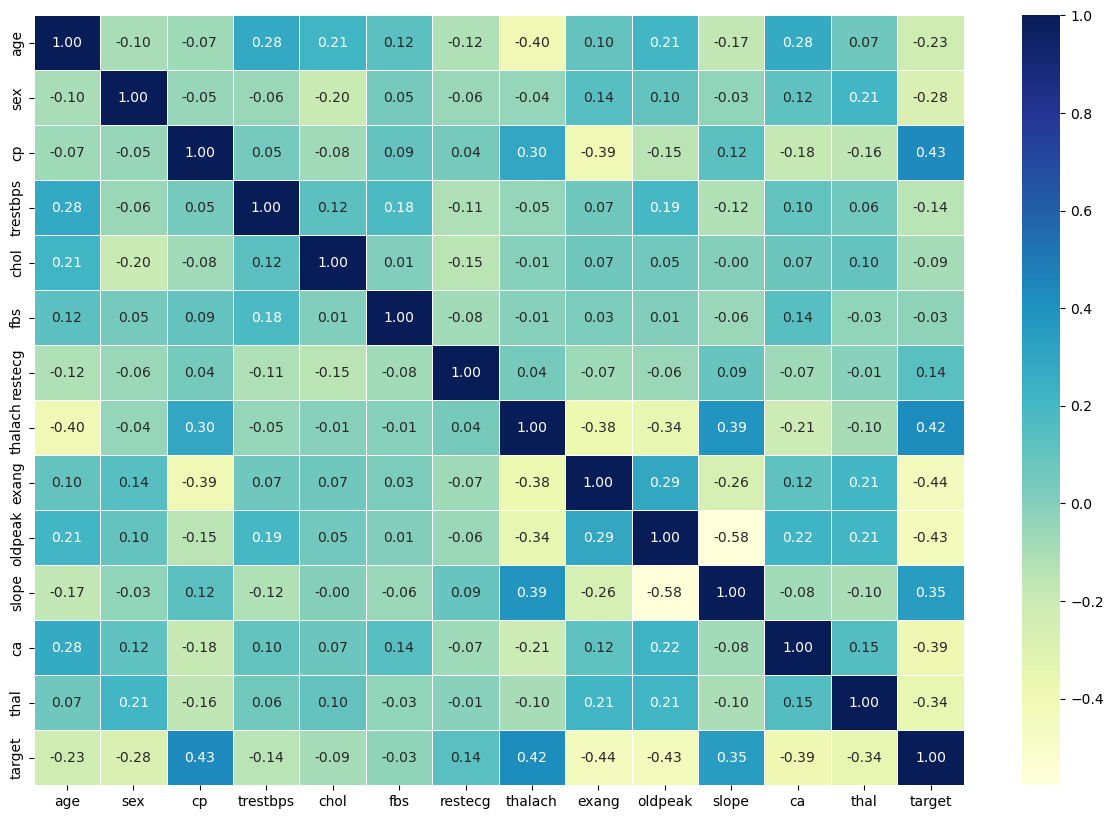

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(15, 10))
plt.yticks(rotation=0);
# Customize the heatmap
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu", ax=ax)

# Display the plot
plt.show()


 ## 5. Modelling

In [26]:
## 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
## Split data into x and y

X = df.drop("target", axis=1)

y = df["target"]

In [24]:
X



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [30]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
# split our data into trainning and testing  sets


np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2)


In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [42]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)


## 1. now we've got our data into trainning and test sets , it's time to build a machine learing model.

## 2. we'll train it( find the patterns ) on the trainning set.

# 3. And we'll test it (use the patterns ) onthe test set.

 
# 4. use scikit learn machine learning map

## we're going to trry 3 different machine learing model

1.logistic Regression
2.K-Nearest Neighbours classifier
3.Random Forest Classifier


In [22]:
# put models in a dictonary

models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()} 
# create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluates given machine learning models.
    models  : a dict of different Scikit-learn machine learning models
    X_train : trainning data (no labels)
    X_test  : testing data ( no labels)
    y_train : trainning labels
    y_test  : test labels 
    
    """
    
# set random seed
 
np.random.seed(42)

#make a dictionary to keep model scores 
model_score = {}

#loop through models

for name, model in models.items():
    # fit the model to the data
    
    model.fit( X_train, y_train)
    
    #Evaluate the model and append its score to model_scores
    
    model_scores[name] = model.score()
return model_scores

C:\Users\Hassan\Desktop\ap1\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TypeError: ClassifierMixin.score() missing 2 required positional arguments: 'X' and 'y'

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate given machine learning models.
    models: a dictionary of different Scikit-learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """

    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores


In [21]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test,
                             y_train=y_train, 
                             y_test=y_test)
model_scores


C:\Users\Hassan\Desktop\ap1\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# model comparsion



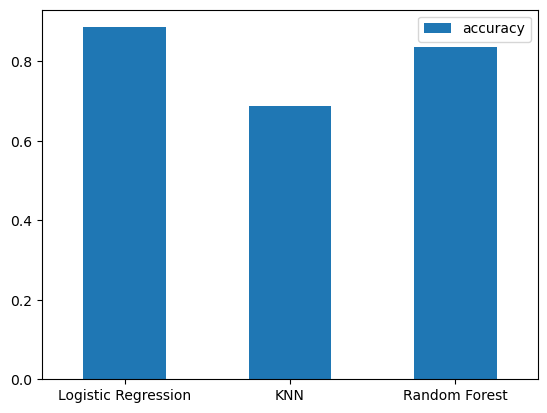

In [55]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0);

<Axes: >

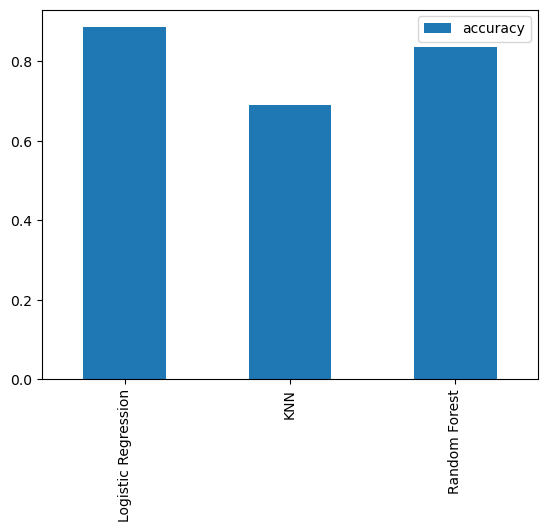

In [56]:
import pandas as pd

# Assuming you have populated the model_scores dictionary using the fit_and_score function

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()


Now we've got baseline model ... and we known a model's first presdiction are'nt always what we should based our next steps off.
what should do ?

Lets's look at the following :
1. Hypyterparameter tunning
2. Feature Importance
3. Confusion matrix
4. cross_validation
5. precision
6. recall
7. F1 score
8. Classification report
9. ROC expert
10. Area under the curve(AUC)


## Hupyterparameter tunning 

In [66]:
# lets tune KNN

train_scores= []
test_scores =[]

#create a list of different values for n_neighbours
neighbors = range(1, 21)

#setup KNN insatnce()

knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm 
    knn.fit(X_train, y_train)
    
    #update the trainning scores list
    
    train_scores.append(knn.score(X_train, y_train))
    
    #update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [67]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [69]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

 Maximum Knn score on the test data :  75.41%  


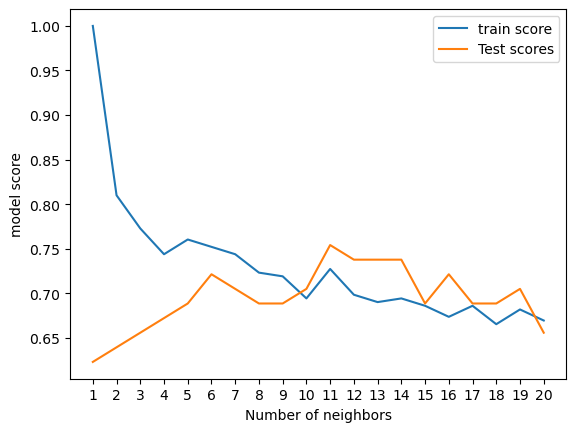

In [76]:
plt.plot(neighbors, train_scores, label = "train score")
plt.plot(neighbors, test_scores, label = "Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("model score")
plt.legend()

print(f" Maximum Knn score on the test data : { max (test_scores)*100: .2f}%  ")


## Hpyerparametrer tunning using randomizedSearchCv

we're going to tune :
* logisticRegression()
* RandomForestClassifier()



 using RandomizedSearchCv
 

In [9]:
# create a hyperparameter grid to for LogisticRegression



Log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


# create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


In [23]:
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=Log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random Hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [24]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [25]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

now we're tuned logisticRegression(), lets's do the same for RandomforestClassifier(..)

In [26]:
# setup Random seed

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rf_grid,
                           cv= 5,
                           n_iter = 20,
                           verbose = True )

# Fit random hyperparametersearch model for randomforestclassifier()

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

# Set random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)


In [27]:
# find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 360,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 5}

In [28]:
# Evalulate the Ranomized search Randomforestclassifier model

rs_rf.score(X_test, y_test)

0.8688524590163934

In [29]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## HyperParameters Tunning with Grid SearchCv

since our logisticregression model provides the best scores so far, we'll try and improve them again using Grid SearchCV

In [20]:
# Different hyperparameter for our LogisticRegression model:

log_reg_grid = {"C" : np.logspace (-4,4,30),
               "solver" : ["liblinear"]}

# setup grid hyperparameter search for LogisticRegression

gs_log_reg = GridSearchCV( LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose =True)

# fit grid hyperparameter search model

gs_log_reg.fit(X_train, y_train);

NameError: name 'X_train' is not defined

In [27]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [28]:
# check the best hyperparametres
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [29]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [38]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# evaluating our tuned machine learning Clasifier, beyond accuracy

* ROC curve and AUC score
* confusion
* Classification report
* Precision
* Recall
*F1-score

.. and it would be great if cross-validation was used where posiible.
To make comparsion and evalute our trained model, firstwe need to make predictions



In [40]:
## Make Prediction with tuned Model

y_preds = gs_log_reg.predict(X_test)

In [41]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [42]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [32]:
## import ROC curve and Calculate and calculate AUC metric
from sklearn.metrics import plot_roc_curve

# Assuming you have already fitted the gs_log_reg model
plot_roc_curve(gs_log_reg, X_test, y_test)



ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\Hassan\Desktop\ap1\heart-disease-project\env\Lib\site-packages\sklearn\metrics\__init__.py)

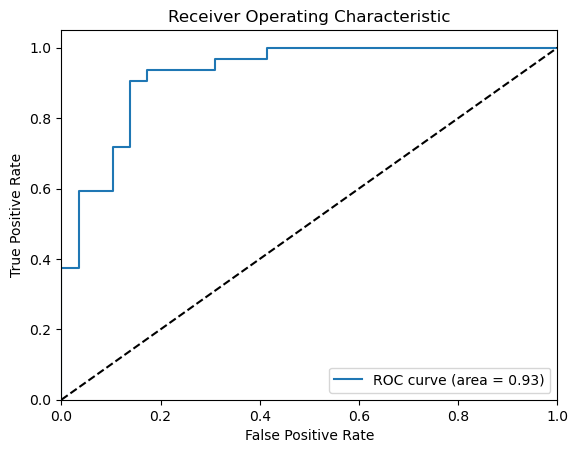

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already fitted the gs_log_reg model
probs = gs_log_reg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


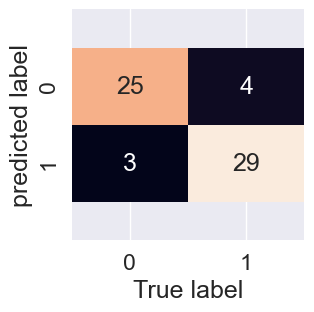

In [59]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    
    """ 
    plots a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom +0.5,top -0.5)
    
plot_conf_mat(y_test, y_preds)
    


now we' ve got a ROC Curve , an AUC metric and a confusion matrix, lets get a classification report as well as cross- validated precision, recall and f1-score

In [61]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evalutaion metrics using Cross validation

we're going to calculate precision, recall amd f1-score of our model using cross-validation and to do so we'll be using cross_val_score()

In [33]:
# check best parameters

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [35]:
# create a new classifier with best parameters

clf = LogisticRegression( C=.20433597178569418,
                        solver='liblinear')


In [43]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc



cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [44]:
#Cross- validated precision

cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='precision')




cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [52]:
#cross-valodated recall

cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='recall')


cv_precision = np.mean(cv_recall)
cv_precision


0.9212121212121213

In [53]:
# cross-validated f1-score

cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='f1')




cv_f1= np.mean(cv_f1)
cv_f1

0.8673007976269721

In [56]:
# visualize cross- validated metrics

cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall":cv_recall,
                          "F1":cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated Classification metrics",
                     legend=False)

ValueError: Length of values (5) does not match length of index (1)

<Axes: title={'center': 'Cross-validated Classification metrics'}>

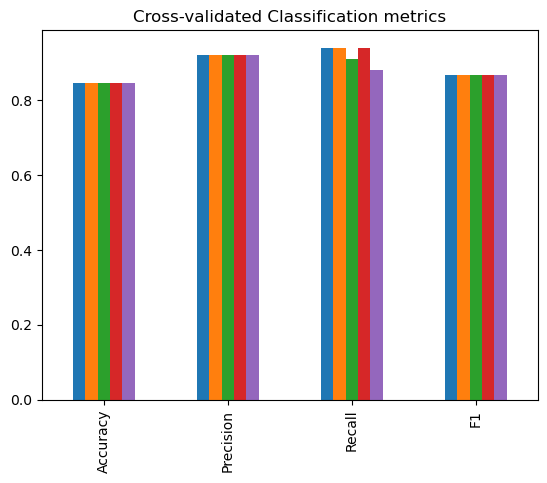

In [57]:
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1
})

cv_metrics.T.plot.bar(title="Cross-validated Classification metrics", legend=False)


## Features Importance

feature importance is another as asking ," which features contributed most to the outcomes of the model and how did they contribute?"

finding feature importance is different for each machine learing model.

lets' find feature importance for legisticregression model..

In [58]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [61]:
## fit an insatnce of LegisticRegression

clf = LogisticRegression(C= .20433597178569418,
                       solver= "liblinear")

clf.fit(X_train, y_train);

In [62]:
# check coeff_

clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [63]:
# match coef's of features to colonm's

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

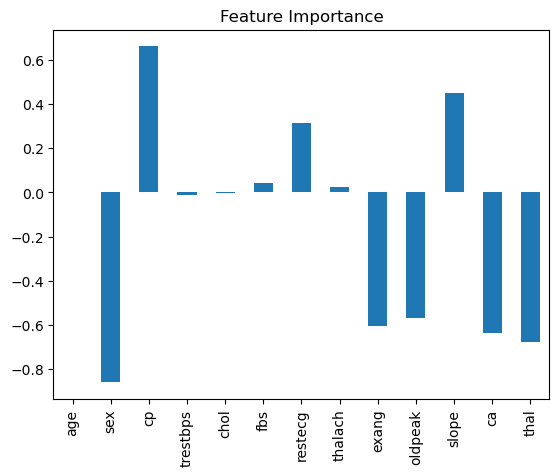

In [65]:
# visualize feature importance

feature_df= pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title= "Feature Importance", legend= False);


In [67]:
pd.crosstab(df["slope"],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Expermintation 

if you havent hit evalution matrix yet ask some question to urself 

* could you collect more data?
* could you try a better model ? Like catBoost or XGBoost?
* could you try improve the current models? (beyond what we've done so far)
* of ur model is good enough (u have hit your evaluation metrics) how would you export it and share it with orthers?


In [ ]:
whj